# UCI Superconductivity dataset Visual Relationships EDA

Продължавам с анализа на данните за свръхпроводниците от UCI архива.
<br> Целта е да проверя за зависимости между числовите променливи и затова ще се съсредоча върху файла с физичните характеристики на материалите.

<br> Първо зареждам необходмите библиотеки:

In [1]:
import numpy as np
import pandas as pd

Още тук ще заредя и библиотеките използвани за визуалния анализ:

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

Инициализираме seaborn и извеждаме версиите на библиотеките:

In [3]:
sns.set()
np.__version__, pd.__version__, mp.__version__, sns.__version__

('1.20.3', '1.3.4', '3.5.0', '0.11.2')

Настройваме matplotlib да визуализира в тетрадката:

In [4]:
%matplotlib inline

Зареждам файла с числовите характеристики. За да не го дублирам ще го заредя от поддиректория data от първата домашна работа и за да не се налага да трия записания автоматичен индекс, ще го го посоча за изпозлване като индекса на текущия дейтасет:

In [5]:
char_ds=pd.read_csv('../Homework-1/data/YG_train.csv', index_col=0)

In [6]:
char_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NUMBER_OF_ELEMENTS               21263 non-null  int64  
 1   MEAN_ATOMIC_MASS                 21263 non-null  float64
 2   WTD_MEAN_ATOMIC_MASS             21263 non-null  float64
 3   GMEAN_ATOMIC_MASS                21263 non-null  float64
 4   WTD_GMEAN_ATOMIC_MASS            21263 non-null  float64
 5   ENTROPY_ATOMIC_MASS              21263 non-null  float64
 6   WTD_ENTROPY_ATOMIC_MASS          21263 non-null  float64
 7   RANGE_ATOMIC_MASS                21263 non-null  float64
 8   WTD_RANGE_ATOMIC_MASS            21263 non-null  float64
 9   STD_ATOMIC_MASS                  21263 non-null  float64
 10  WTD_STD_ATOMIC_MASS              21263 non-null  float64
 11  MEAN_FIE                         21263 non-null  float64
 12  WTD_MEAN_FIE      

## Диаграми на разпределението

Нека първо проверим как изгежда разпределението на стойностите в 1 характеристика:

<AxesSubplot:xlabel='MEAN_ATOMIC_MASS', ylabel='Count'>

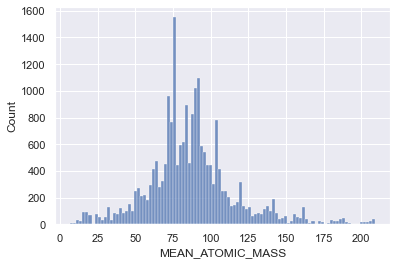

In [7]:
sns.histplot(data=char_ds, x='MEAN_ATOMIC_MASS')

<AxesSubplot:xlabel='MEAN_ATOMIC_MASS', ylabel='Count'>

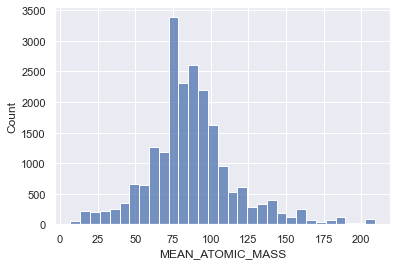

In [8]:
sns.histplot(data=char_ds, x='MEAN_ATOMIC_MASS', bins=31)

Прилича на стандартно разпределение с централна стойност около 80 и лек ексцес в ляво при 75.

In [9]:
pd.set_option("display.max_rows", None)

In [10]:
pd.set_option("display.max_columns", None)

За да проверя коефициентите на ексцес и на асиметрия използвам функциите <b>kurtosis()</b> и <b>skew()</b> и сортирам резултата със <b>sort_values</b>:

In [11]:
char_ds.kurtosis().sort_values()

RANGE_THERMALCONDUCTIVITY          -1.758985
WTD_STD_THERMALCONDUCTIVITY        -1.653865
STD_THERMALCONDUCTIVITY            -1.641077
WTD_STD_FIE                        -1.427789
WTD_MEAN_FIE                       -1.231702
RANGE_FIE                          -1.130456
WTD_RANGE_FIE                      -1.099577
STD_FIE                            -0.973387
WTD_GMEAN_ATOMIC_RADIUS            -0.924024
RANGE_ATOMIC_RADIUS                -0.912731
WTD_GMEAN_FIE                      -0.907185
WTD_STD_ATOMIC_RADIUS              -0.857785
WTD_ENTROPY_THERMALCONDUCTIVITY    -0.854255
NUMBER_OF_ELEMENTS                 -0.685239
RANGE_ATOMIC_MASS                  -0.677880
ENTROPY_THERMALCONDUCTIVITY        -0.637202
WTD_MEAN_ATOMIC_RADIUS             -0.604015
RANGE_VALENCE                      -0.539639
CRITICAL_TEMP                      -0.532060
WTD_STD_ATOMIC_MASS                -0.514852
STD_ATOMIC_RADIUS                  -0.495780
STD_ATOMIC_MASS                    -0.438672
WTD_MEAN_V

Pandas kurtosis() функцията използва дефиницията на Фишер, което значи че ако резултата е близък до 0, то разпределението на стойностите в колоната е най-близко до нормалното, гаусово разпределние. Това е така за: <br>WTD_ENTROPY_ATOMIC_RADIUS          -0.104180
<br>WTD_GMEAN_VALENCE                  -0.072128
<br>ENTROPY_FUSIONHEAT                  0.032350
<br>WTD_ENTROPY_VALENCE                 0.055413
<br>MEAN_VALENCE                        0.147443
<br>ENTROPY_VALENCE                     0.158577

In [12]:
char_ds.skew().sort_values()

ENTROPY_ELECTRONAFFINITY          -0.912379
ENTROPY_DENSITY                   -0.807427
ENTROPY_FIE                       -0.792549
WTD_ENTROPY_ATOMIC_RADIUS         -0.789187
ENTROPY_ATOMIC_MASS               -0.785245
ENTROPY_VALENCE                   -0.773288
ENTROPY_ATOMIC_RADIUS             -0.749810
STD_ATOMIC_RADIUS                 -0.749209
WTD_ENTROPY_VALENCE               -0.729390
RANGE_ATOMIC_RADIUS               -0.687554
WTD_STD_ATOMIC_RADIUS             -0.645907
WTD_ENTROPY_ATOMIC_MASS           -0.626834
WTD_ENTROPY_DENSITY               -0.602560
ENTROPY_FUSIONHEAT                -0.578708
WTD_ENTROPY_FUSIONHEAT            -0.571975
MEAN_ATOMIC_RADIUS                -0.565582
RANGE_FIE                         -0.456355
STD_FIE                           -0.452485
WTD_STD_FIE                       -0.409954
RANGE_ATOMIC_MASS                 -0.377125
STD_ATOMIC_MASS                   -0.348372
WTD_GMEAN_FIE                     -0.314774
WTD_STD_ATOMIC_MASS             

Най-близките стойности до 0, което значи и най-симетрично разпределени характеристики проявяват тези променливи:
<br>ENTROPY_THERMALCONDUCTIVITY       -0.121493
<br>WTD_STD_THERMALCONDUCTIVITY       -0.087984
<br>WTD_ENTROPY_FIE                   -0.030281
<br>NUMBER_OF_ELEMENTS                 0.009215
<br>GMEAN_ATOMIC_RADIUS                0.092132
<br>WTD_RANGE_ELECTRONAFFINITY         0.114603

За да сравним графично разпределението на данните и спрямо нормалното ще използвам <b>probplot</b> фунцкията от <b>scipy</b> пакета:

In [13]:
from scipy.stats import probplot

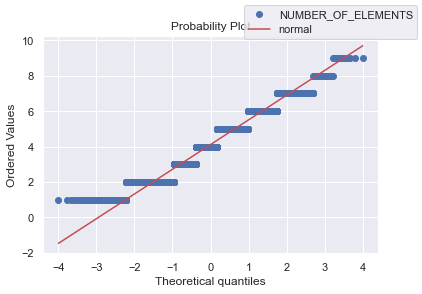

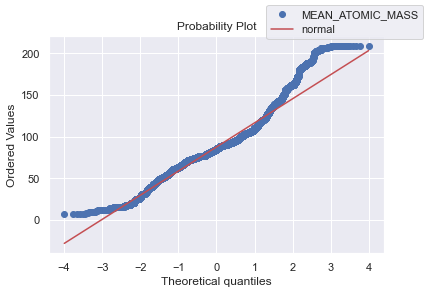

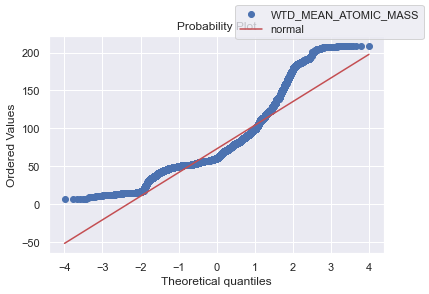

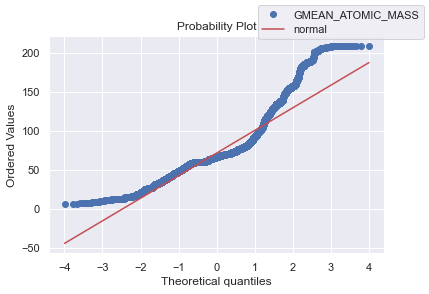

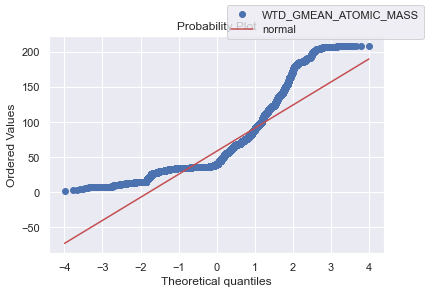

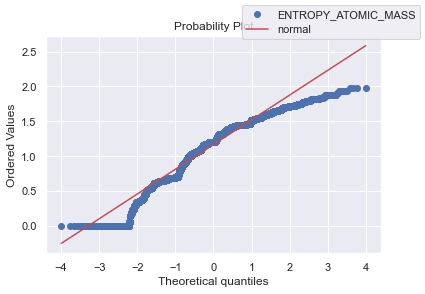

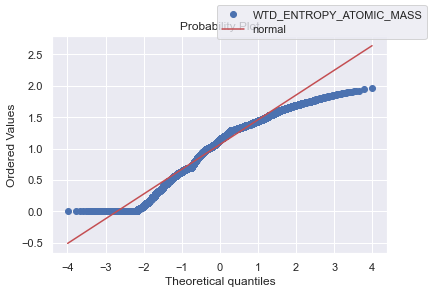

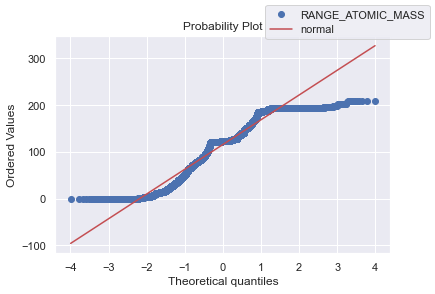

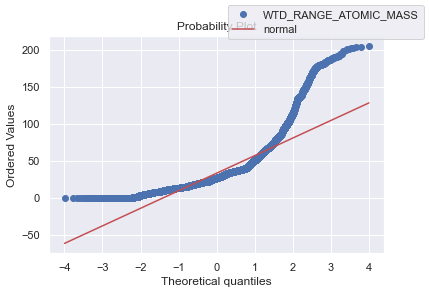

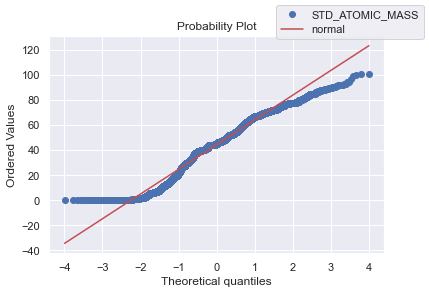

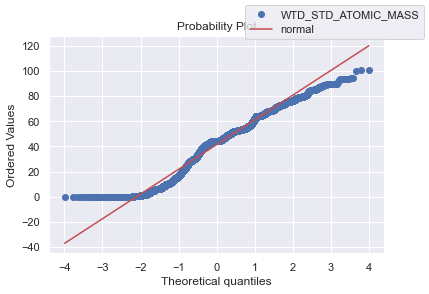

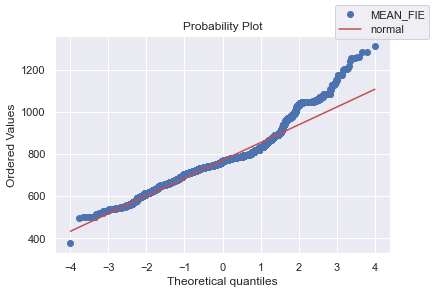

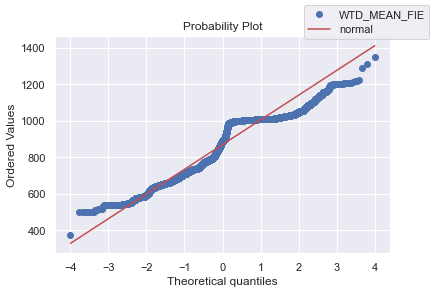

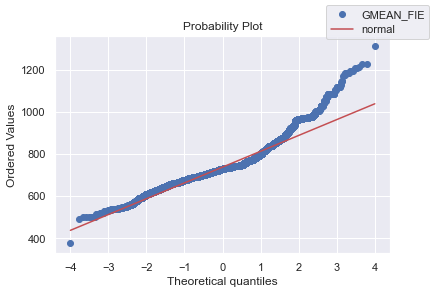

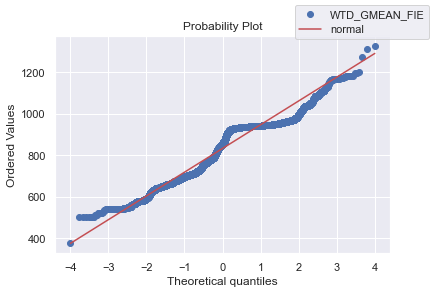

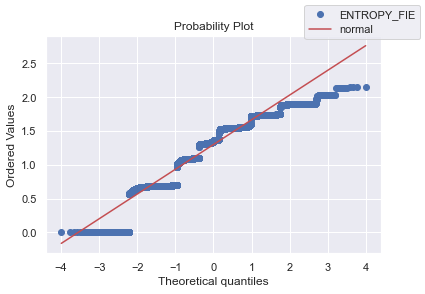

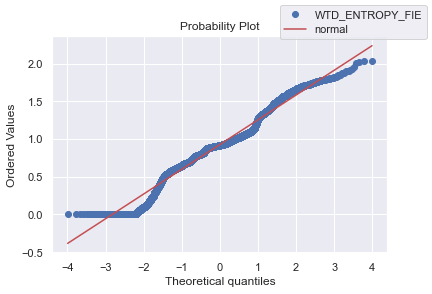

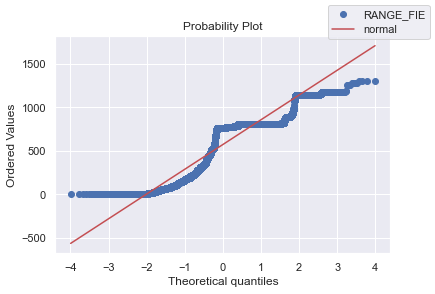

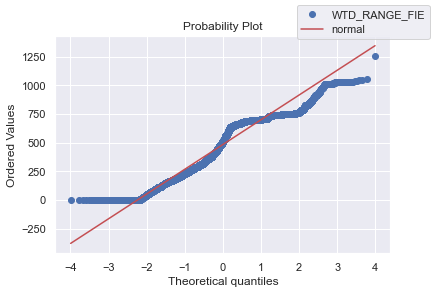

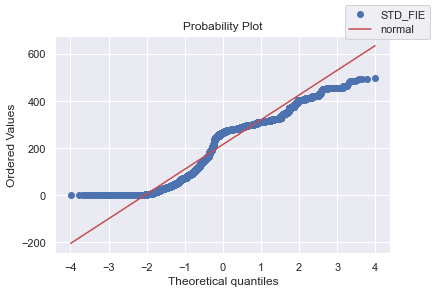

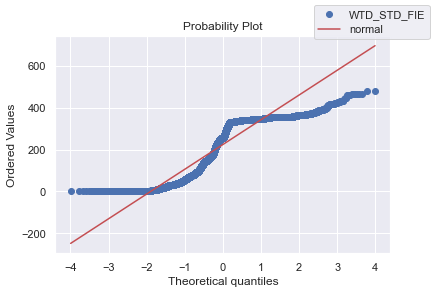

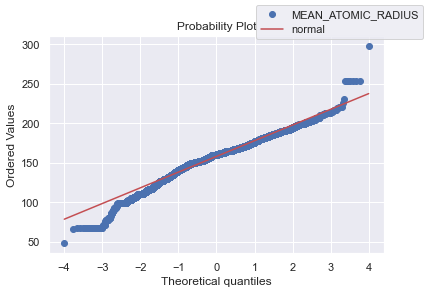

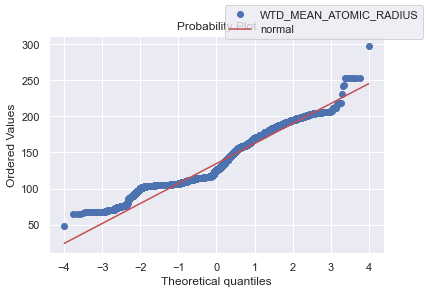

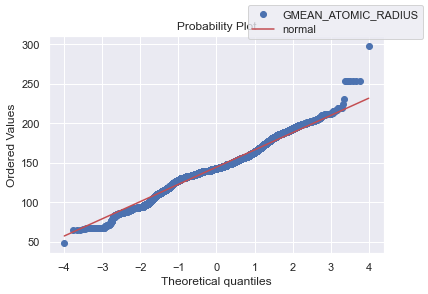

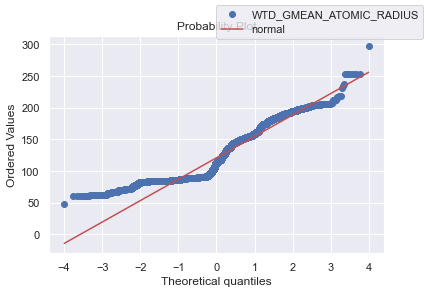

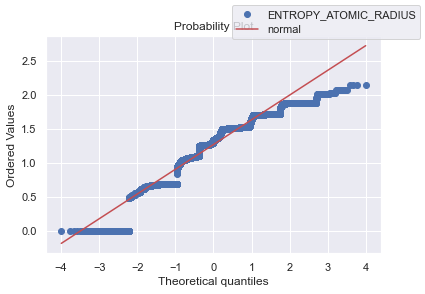

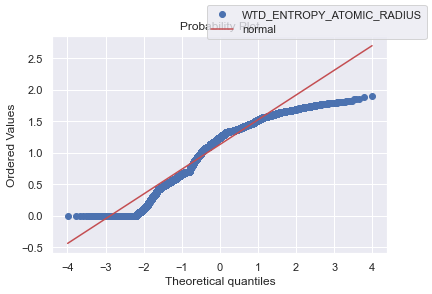

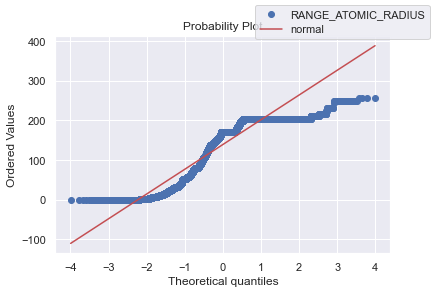

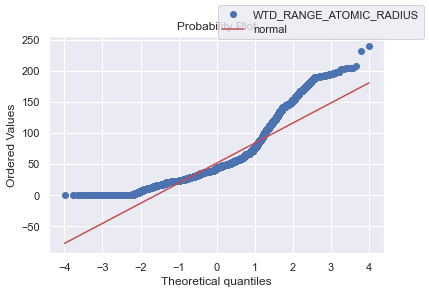

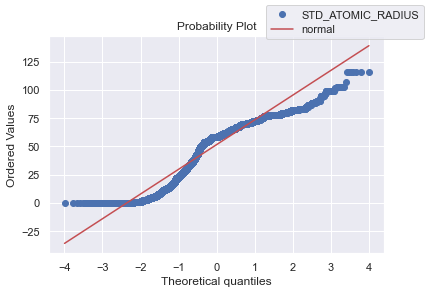

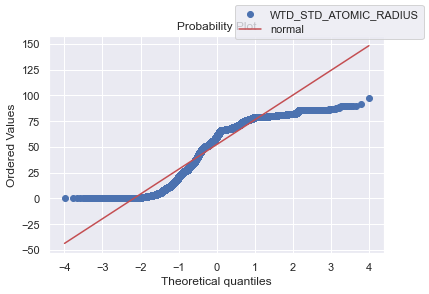

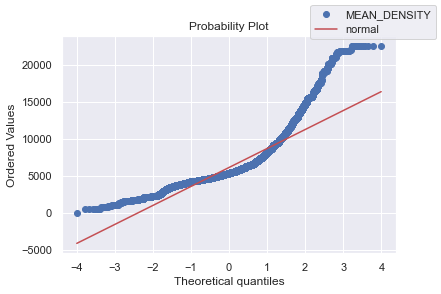

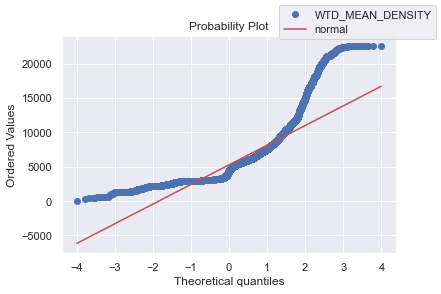

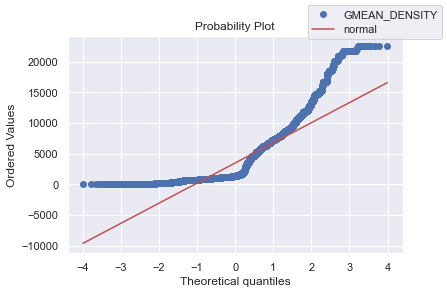

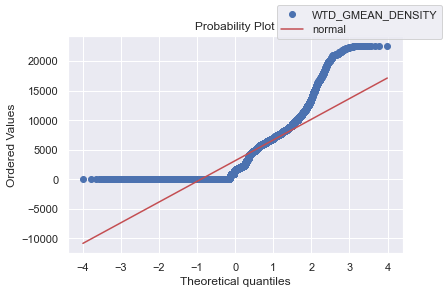

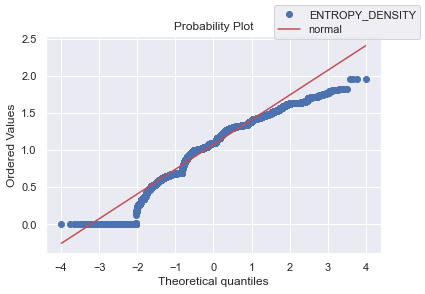

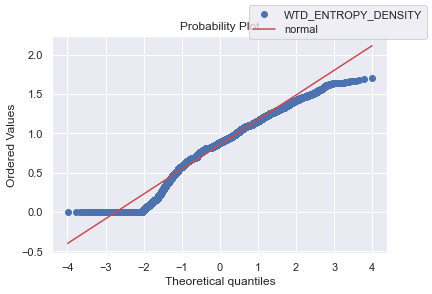

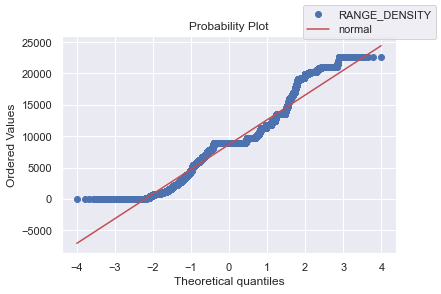

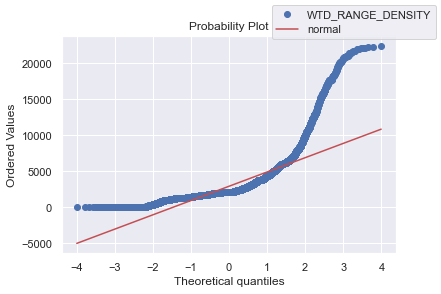

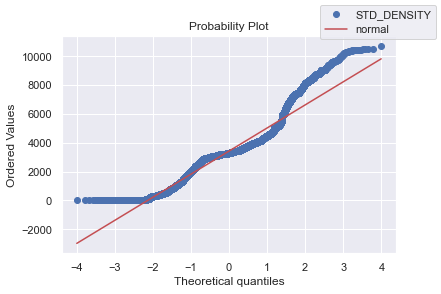

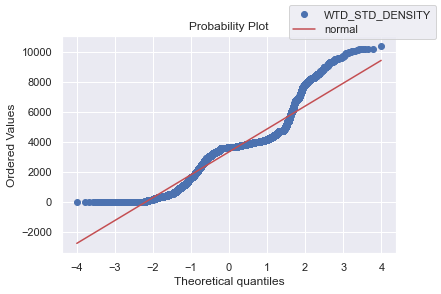

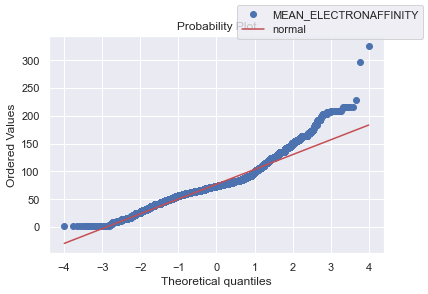

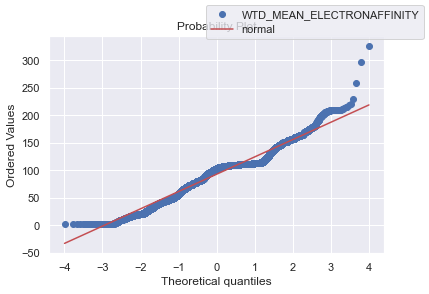

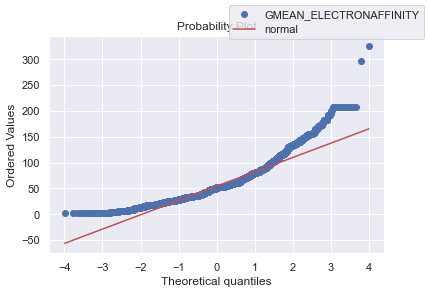

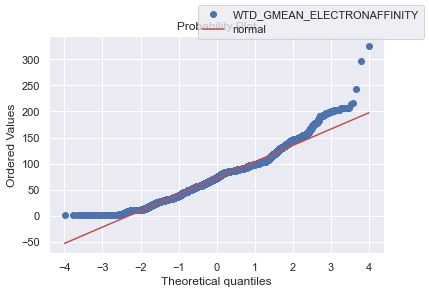

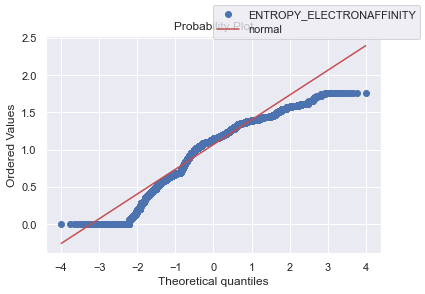

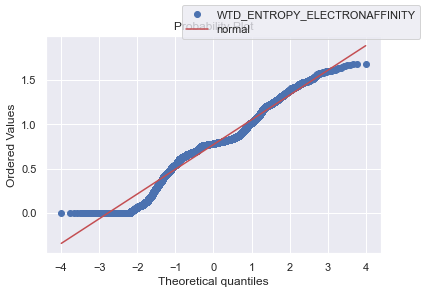

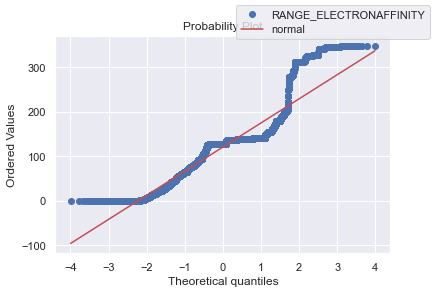

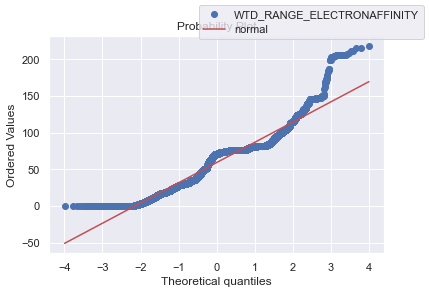

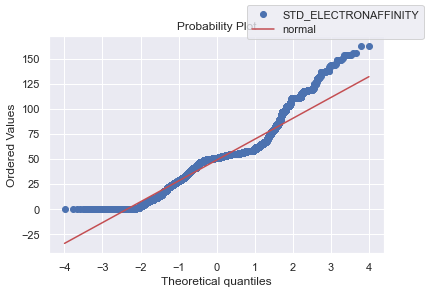

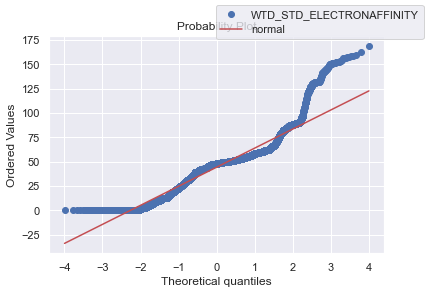

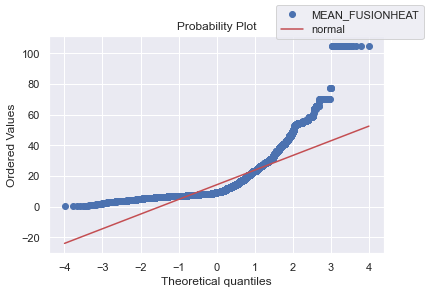

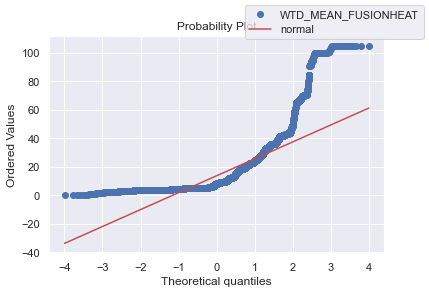

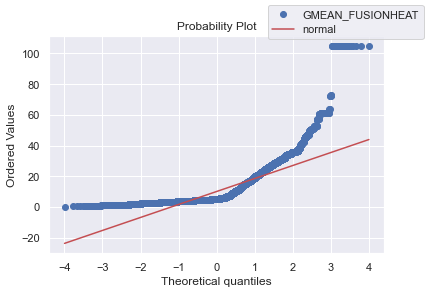

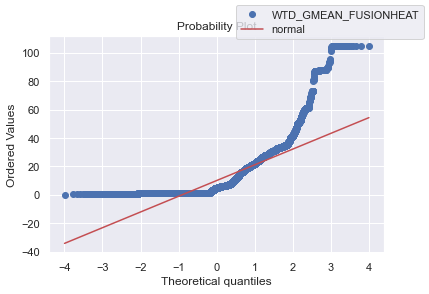

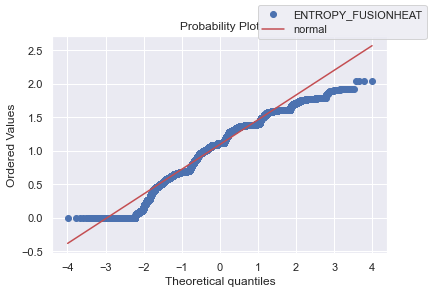

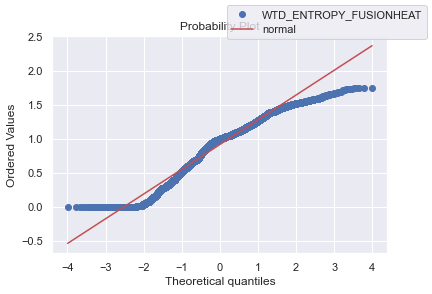

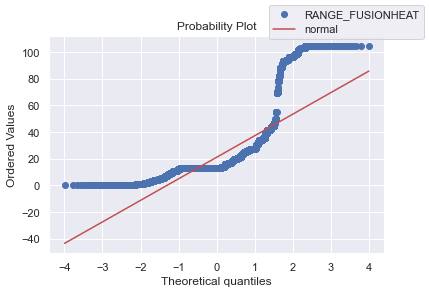

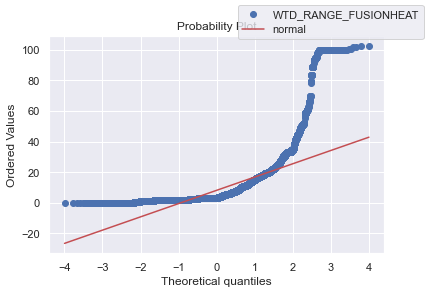

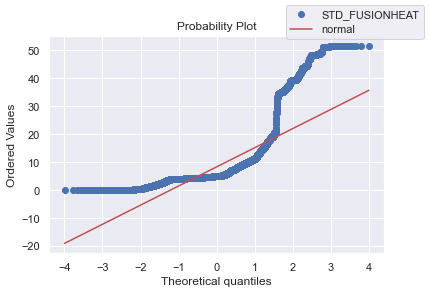

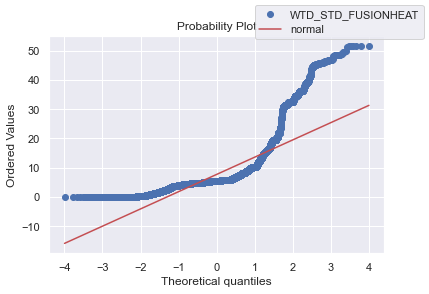

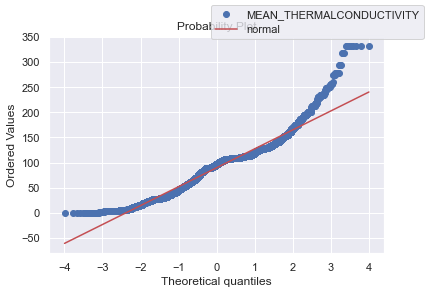

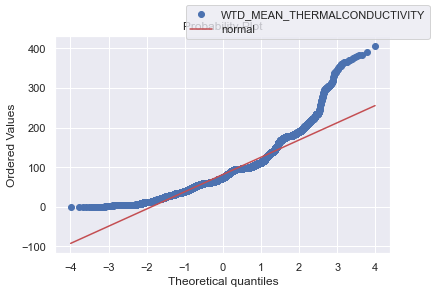

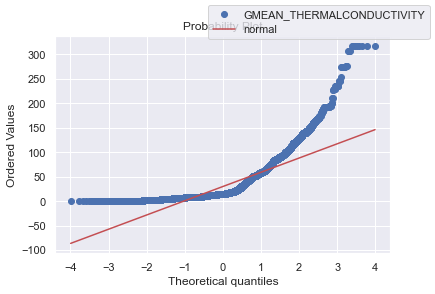

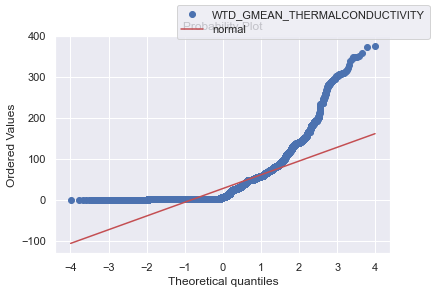

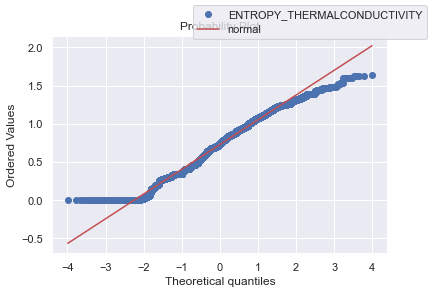

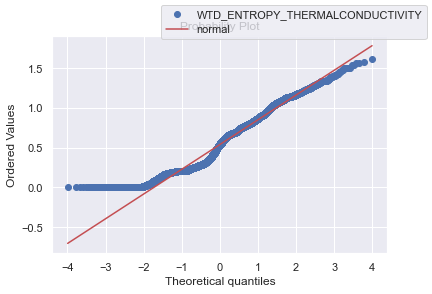

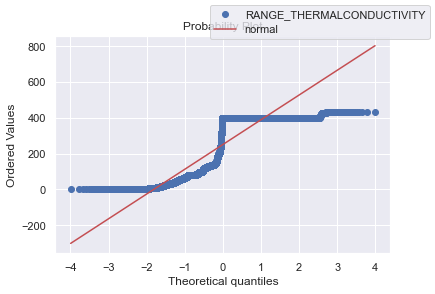

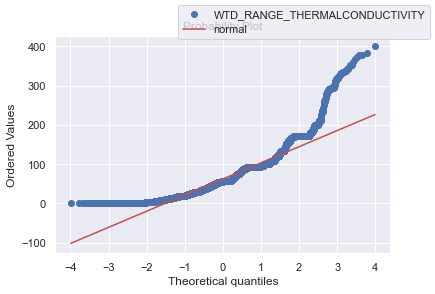

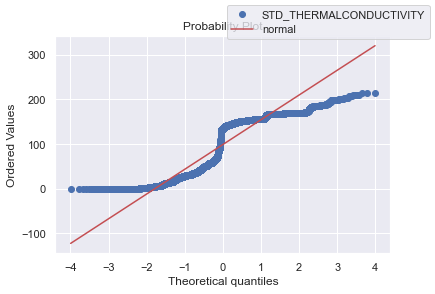

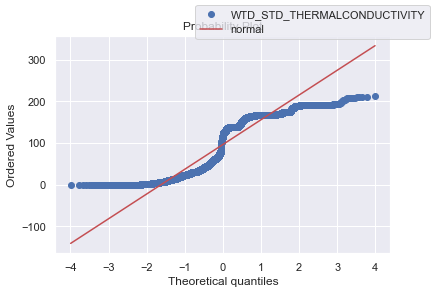

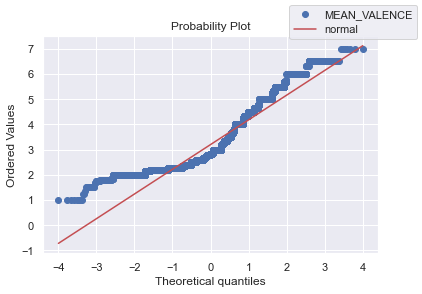

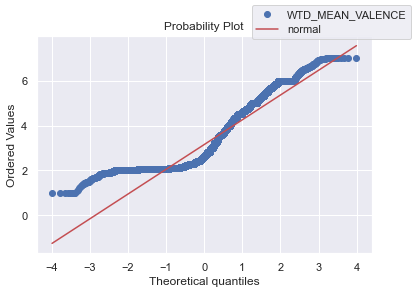

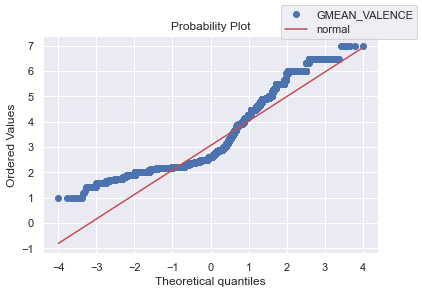

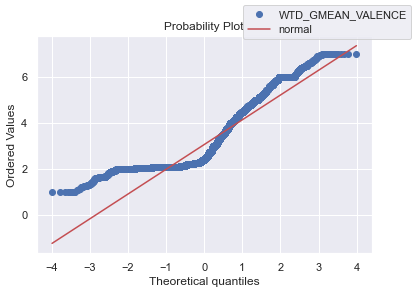

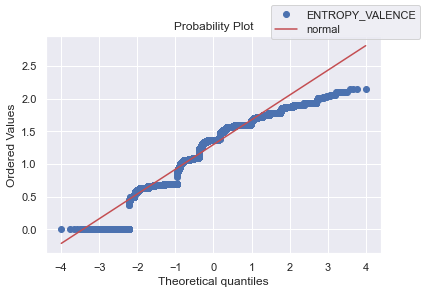

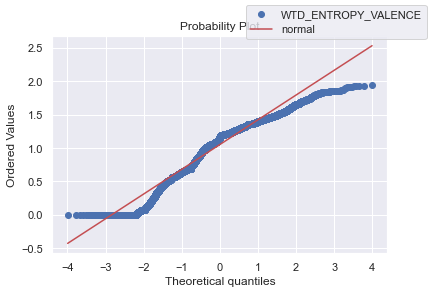

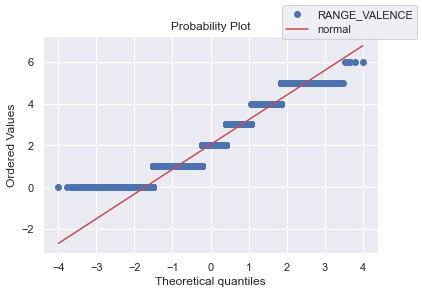

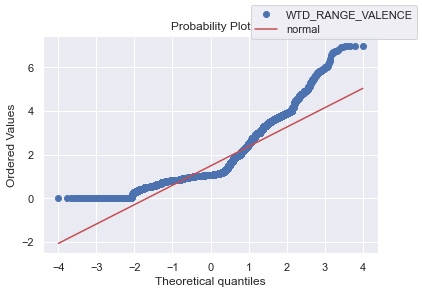

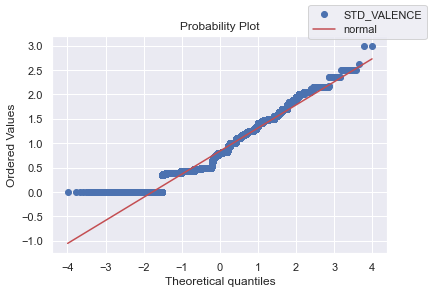

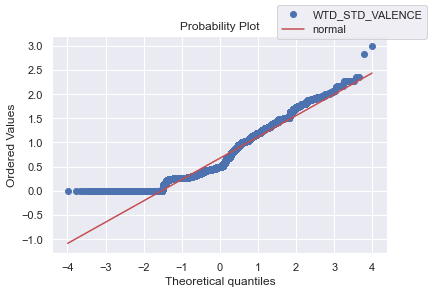

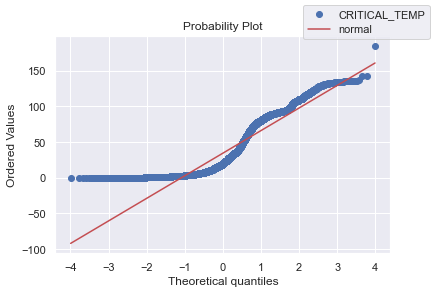

In [14]:
for col in char_ds.columns : (
    probplot(char_ds[col], plot=plt), 
    plt.figlegend([col,'normal']), 
    plt.show()
);

От графиките се вижда, че разпределението на стойностите в характеристиките свързани с атомния радиус най-много наподобява нормалното разпределение.

По-точен тест за нормалност на дадена характеристика е тестът на <b>Shapiro-Wilk</b> от <b>scipy</b> библиотеката. Понеже в дейтасета наблюденията ни са над 5000, което е ограничението на <b>shapiro</b> метода, ще изпозлвам метода проверяващ теста на <b>Kolmogorov-Smirnov</b>: 

In [15]:
from scipy import stats

In [16]:
for col in char_ds.columns : print(col, stats.kstest(char_ds[col], 'norm'))

NUMBER_OF_ELEMENTS KstestResult(statistic=0.9638463031738638, pvalue=0.0)
MEAN_ATOMIC_MASS KstestResult(statistic=0.9999999999980533, pvalue=0.0)
WTD_MEAN_ATOMIC_MASS KstestResult(statistic=0.999999999933391, pvalue=0.0)
GMEAN_ATOMIC_MASS KstestResult(statistic=0.999999948279583, pvalue=0.0)
WTD_GMEAN_ATOMIC_MASS KstestResult(statistic=0.999858747767874, pvalue=0.0)
ENTROPY_ATOMIC_MASS KstestResult(statistic=0.6679528448839179, pvalue=0.0)
WTD_ENTROPY_ATOMIC_MASS KstestResult(statistic=0.5952808716713741, pvalue=0.0)
RANGE_ATOMIC_MASS KstestResult(statistic=0.9769748459705314, pvalue=0.0)
WTD_RANGE_ATOMIC_MASS KstestResult(statistic=0.9766430883249013, pvalue=0.0)
STD_ATOMIC_MASS KstestResult(statistic=0.967060653625047, pvalue=0.0)
WTD_STD_ATOMIC_MASS KstestResult(statistic=0.9603280625570599, pvalue=0.0)
MEAN_FIE KstestResult(statistic=1.0, pvalue=0.0)
WTD_MEAN_FIE KstestResult(statistic=1.0, pvalue=0.0)
GMEAN_FIE KstestResult(statistic=1.0, pvalue=0.0)
WTD_GMEAN_FIE KstestResult(sta

За всички характеристики <b>pvalue</b> е по-малко от <b>0.05</b>, следователно можем да отхвърлим нулевата хипотеза и да потвърдим, че наблюденията не са нормално разпределени.

За всеки случай проверявам с цикъл:

In [17]:
for col in char_ds.columns :
    if stats.kstest(char_ds[col], 'norm')[1] > 0.05 :
        print(col, stats.kstest(char_ds[col], 'norm'))
else : print('Reached last column.')

Reached last column.


За да съдим за разпределението в цялата популация на база на текущата извадка използвам <b>kurtosistest</b> и <b>skewtest</b> от <b>scipy.stats</b>

In [18]:
for col in char_ds.columns : 
    if stats.kurtosistest(char_ds[col])[1] > 0.05 :
        print(col, stats.kurtosistest(char_ds[col]))
else : print('Reached last column.')

ENTROPY_FUSIONHEAT KurtosistestResult(statistic=0.9649153755655394, pvalue=0.3345871995590982)
WTD_ENTROPY_VALENCE KurtosistestResult(statistic=1.622775692239792, pvalue=0.10463736380678842)
Reached last column.


Само 2 характеристики имат коефициент на ексцес близък до този на нормалното разпределение и това са ENTROPY_FUSIONHEAT и WTD_ENTROPY_VALENCE.

In [19]:
for col in char_ds.columns : 
    if stats.skewtest(char_ds[col])[1] > 0.05 :
        print(col, stats.skewtest(char_ds[col]))
else : print('Reached last column.')

NUMBER_OF_ELEMENTS SkewtestResult(statistic=0.5487394108743497, pvalue=0.5831842957373591)
WTD_ENTROPY_FIE SkewtestResult(statistic=-1.8027215916977886, pvalue=0.07143194946650708)
Reached last column.


Отново само две характеристики - WTD_ENTROPY_FIE и разбира се броя елементи в материала имат коефициент на асиметрия подобен на нормалното разпределение.

Изглежда, че нямаме характеристика с нормално разпределение. За да потвърдя ще използвам и комбиниращия <b>kurtosistest</b> и <b>skewtest</b> - <b>normaltest</b>:

In [20]:
for col in char_ds.columns : 
    if stats.normaltest(char_ds[col])[1] > 0.05 :
        print(col, stats.normaltest(char_ds[col]))
else : print('Reached last column.')

Reached last column.


Резултатите потвърждават, че наистина нито една от характеристиките ни няма нормално разпределение на стойностите.

### Диаграми на разсейването:

За да проверя за наличието на зависимости между предикторите и между предикторите и целевата променлива <u>CRITICAL_TEMP</u> ще започна изследването с визуалното представяне на диграмите на разсейването (scatter plot):

По диагонала ще покажа плътността на разпределението на стойностите в съответната характеристика, а в другите клетки ще покажа връзката между характеристиките.

In [ ]:
pp = sns.pairplot(data=char_ds, corner=True, diag_kind='kde');
pp.savefig('./img/ScatterPlotPairs.pdf', dpi=300)

<a href='./img/ScatterPlotPairs.pdf'>Scatter Plot Pairs.pdf</a>

In [ ]:
ppc=sns.pairplot(
    data=char_ds, 
    hue='NUMBER_OF_ELEMENTS', 
    corner=True,
    diag_kind='kde'
);
ppc.savefig('./img/SPPByElementsCount.pdf', dpi=300) 

<a href='./img/SPPByElementsCount.pdf'>Scatter Plot Pairs By Number of Elements.pdf</a>

### Коефициент на корелация:

За да потвърдя предположенията от визуалния анализ ще изчисля коефициента на линейна зависимост (коефициента на корелация) по метода на Пиърсън:

In [21]:
corr = char_ds.corr(method='pearson')
corr

NUMBER_OF_ELEMENTS  MEAN_ATOMIC_MASS  \
NUMBER_OF_ELEMENTS                         1.000000         -0.141923   
MEAN_ATOMIC_MASS                          -0.141923          1.000000   
WTD_MEAN_ATOMIC_MASS                      -0.353064          0.815977   
GMEAN_ATOMIC_MASS                         -0.292969          0.940298   
WTD_GMEAN_ATOMIC_MASS                     -0.454525          0.745841   
ENTROPY_ATOMIC_MASS                        0.939304         -0.104000   
WTD_ENTROPY_ATOMIC_MASS                    0.881845         -0.097609   
RANGE_ATOMIC_MASS                          0.682777          0.125659   
WTD_RANGE_ATOMIC_MASS                     -0.320293          0.446225   
STD_ATOMIC_MASS                            0.513998          0.196460   
WTD_STD_ATOMIC_MASS                        0.546391          0.130675   
MEAN_FIE                                   0.167451         -0.285782   
WTD_MEAN_FIE                               0.484445         -0.222097   
GMEAN_FIE                                  0.024229         -0.240565   
WTD_GMEAN_FIE                              0.424152         -0.219381   
ENTROPY_FIE                                0.973195         -0.166935   
WTD_ENTROPY_FIE                            0.719209         -0.163565   
RANGE_FIE                                  0.781227         -0.255628   
WTD_RANGE_FIE                              0.329624         -0.080545   
STD_FIE                                    0.674005         -0.276561   
WTD_STD_FIE                                0.717831         -0.222812   
MEAN_ATOMIC_RADIUS                        -0.001389          0.497664   
WTD_MEAN_ATOMIC_RADIUS                    -0.422144          0.376760   
GMEAN_ATOMIC_RADIUS                       -0.240444          0.561061   
WTD_GMEAN_ATOMIC_RADIUS                   -0.518256          0.359894   
ENTROPY_ATOMIC_RADIUS                      0.972245         -0.140034   
WTD_ENTROPY_ATOMIC_RADIUS                  0.904121         -0.147604   
RANGE_ATOMIC_RADIUS                        0.768060         -0.270695   
WTD_RANGE_ATOMIC_RADIUS                   -0.371350          0.141100   
STD_ATOMIC_RADIUS                          0.624810         -0.326403   
WTD_STD_ATOMIC_RADIUS                      0.695089         -0.280440   
MEAN_DENSITY                              -0.418675          0.756861   
WTD_MEAN_DENSITY                          -0.507895          0.608935   
GMEAN_DENSITY                             -0.630504          0.596485   
WTD_GMEAN_DENSITY                         -0.649882          0.525588   
ENTROPY_DENSITY                            0.871832         -0.043416   
WTD_ENTROPY_DENSITY                        0.767078          0.026325   
RANGE_DENSITY                              0.413486          0.198067   
WTD_RANGE_DENSITY                         -0.355389          0.342391   
STD_DENSITY                                0.210724          0.245042   
WTD_STD_DENSITY                            0.334072          0.180943   
MEAN_ELECTRONAFFINITY                     -0.119303          0.088230   
WTD_MEAN_ELECTRONAFFINITY                  0.195608          0.061103   
GMEAN_ELECTRONAFFINITY                    -0.356067          0.189282   
WTD_GMEAN_ELECTRONAFFINITY                -0.052884          0.134382   
ENTROPY_ELECTRONAFFINITY                   0.877304         -0.091539   
WTD_ENTROPY_ELECTRONAFFINITY               0.625798         -0.107651   
RANGE_ELECTRONAFFINITY                     0.531540         -0.187069   
WTD_RANGE_ELECTRONAFFINITY                 0.241411          0.010235   
STD_ELECTRONAFFINITY                       0.423738         -0.164960   
WTD_STD_ELECTRONAFFINITY                   0.480813         -0.133101   
MEAN_FUSIONHEAT                           -0.437624         -0.137669   
WTD_MEAN_FUSIONHEAT                       -0.449272         -0.135429   
GMEAN_FUSIONHEAT                          -0.514252          0.014818   
WTD_GMEAN_FUSIONHE

За да го покажа и графично първо създавам нулева маска с формата на <b>corr</b> и после запълвам горната дясна половина с единици.

In [22]:
mask=np.zeros_like(corr)
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Запълвам горната половна по диагонал с единици:

In [23]:
mask[np.triu_indices_from(mask)]=True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

И накрая визуализирам коефициента на корелация в <b>heatmap</b> диаграма:

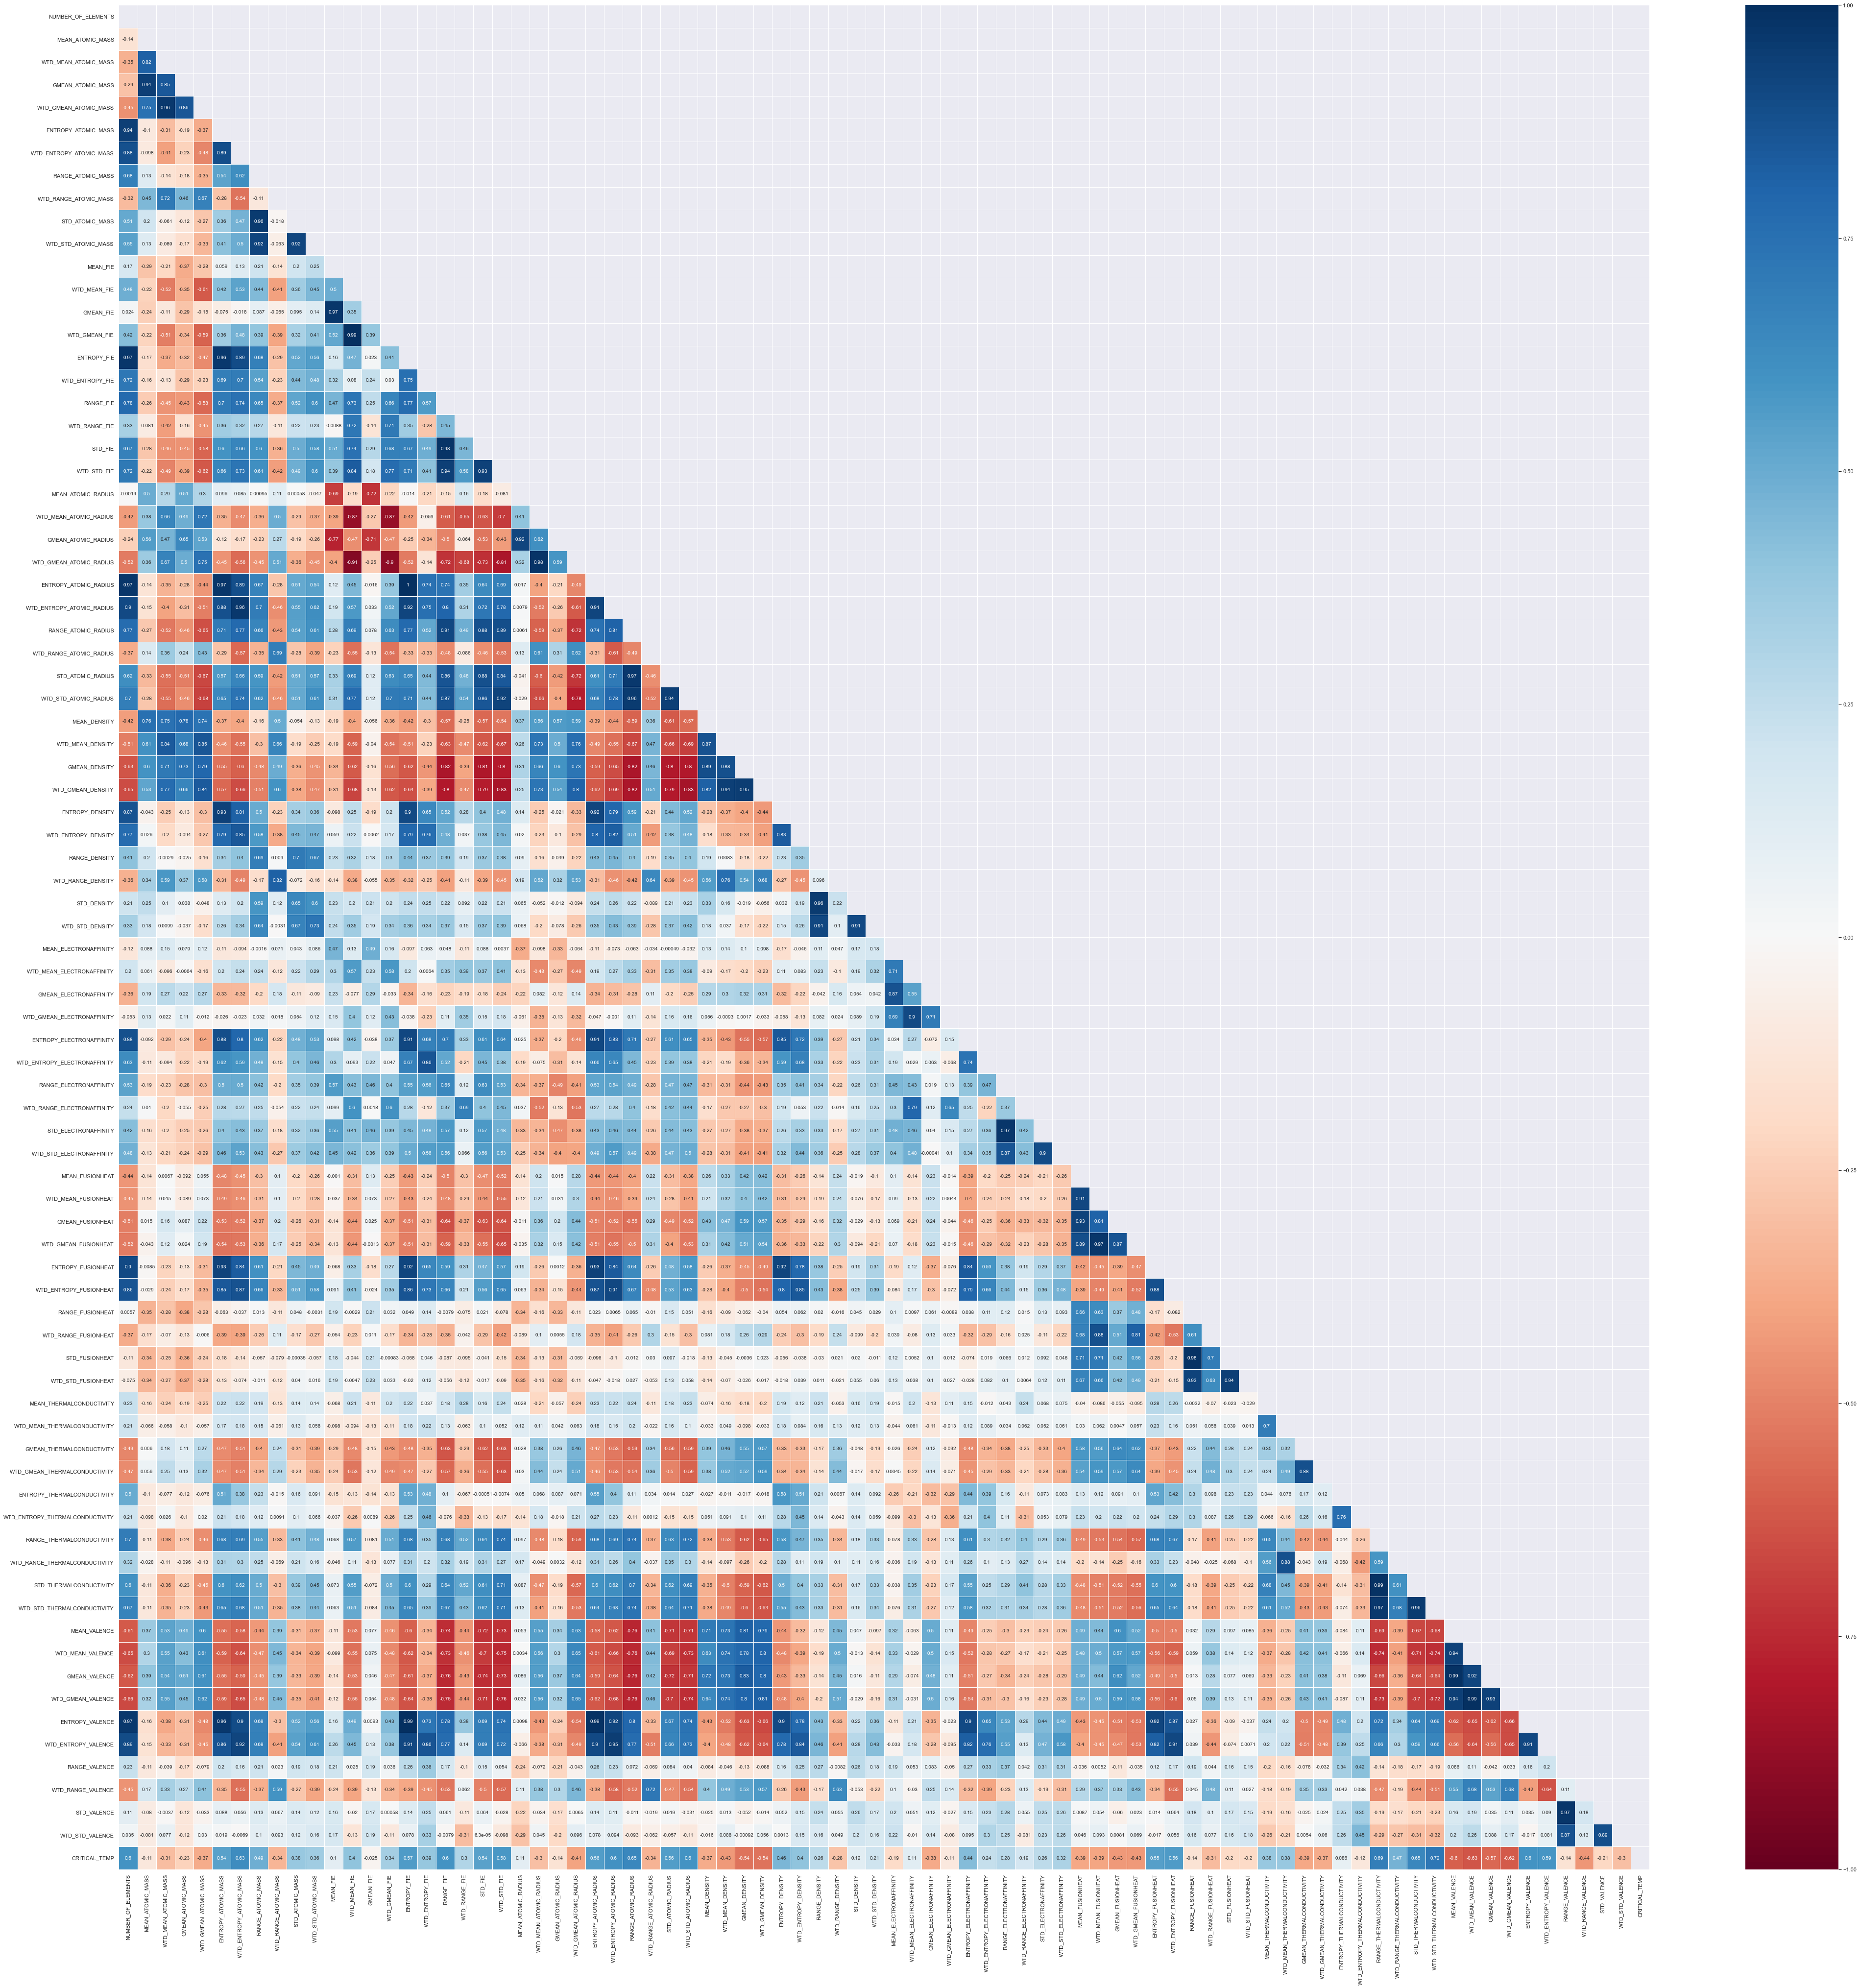

In [34]:
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            linewidths=1, 
            cmap='RdBu', 
            vmin=-1, 
            vmax=1,
            xticklabels=True,
            yticklabels=True
           );
plt.gcf().set_size_inches(70, 70)
plt.savefig('./img/HeatMapPearson.pdf', dpi=300)

<a href='./img/HeatMapPearson.pdf'>Heat Map Pearson.pdf</a>

За да видя връзката между предикторите и целевата променлива ще използвам стълбова диаграма:

In [24]:
link = corr['CRITICAL_TEMP'].sort_values()
link

WTD_MEAN_VALENCE                  -0.632401
WTD_GMEAN_VALENCE                 -0.615653
MEAN_VALENCE                      -0.600085
GMEAN_VALENCE                     -0.573068
GMEAN_DENSITY                     -0.541684
WTD_GMEAN_DENSITY                 -0.540046
WTD_RANGE_VALENCE                 -0.439901
WTD_MEAN_DENSITY                  -0.433940
WTD_GMEAN_FUSIONHEAT              -0.432365
GMEAN_FUSIONHEAT                  -0.431795
WTD_GMEAN_ATOMIC_RADIUS           -0.405176
WTD_MEAN_FUSIONHEAT               -0.394117
GMEAN_THERMALCONDUCTIVITY         -0.387192
MEAN_FUSIONHEAT                   -0.385509
GMEAN_ELECTRONAFFINITY            -0.380568
WTD_GMEAN_THERMALCONDUCTIVITY     -0.371601
WTD_GMEAN_ATOMIC_MASS             -0.369858
MEAN_DENSITY                      -0.368262
WTD_RANGE_ATOMIC_RADIUS           -0.344100
WTD_RANGE_ATOMIC_MASS             -0.337131
WTD_RANGE_FUSIONHEAT              -0.314178
WTD_MEAN_ATOMIC_MASS              -0.312272
WTD_STD_VALENCE                 

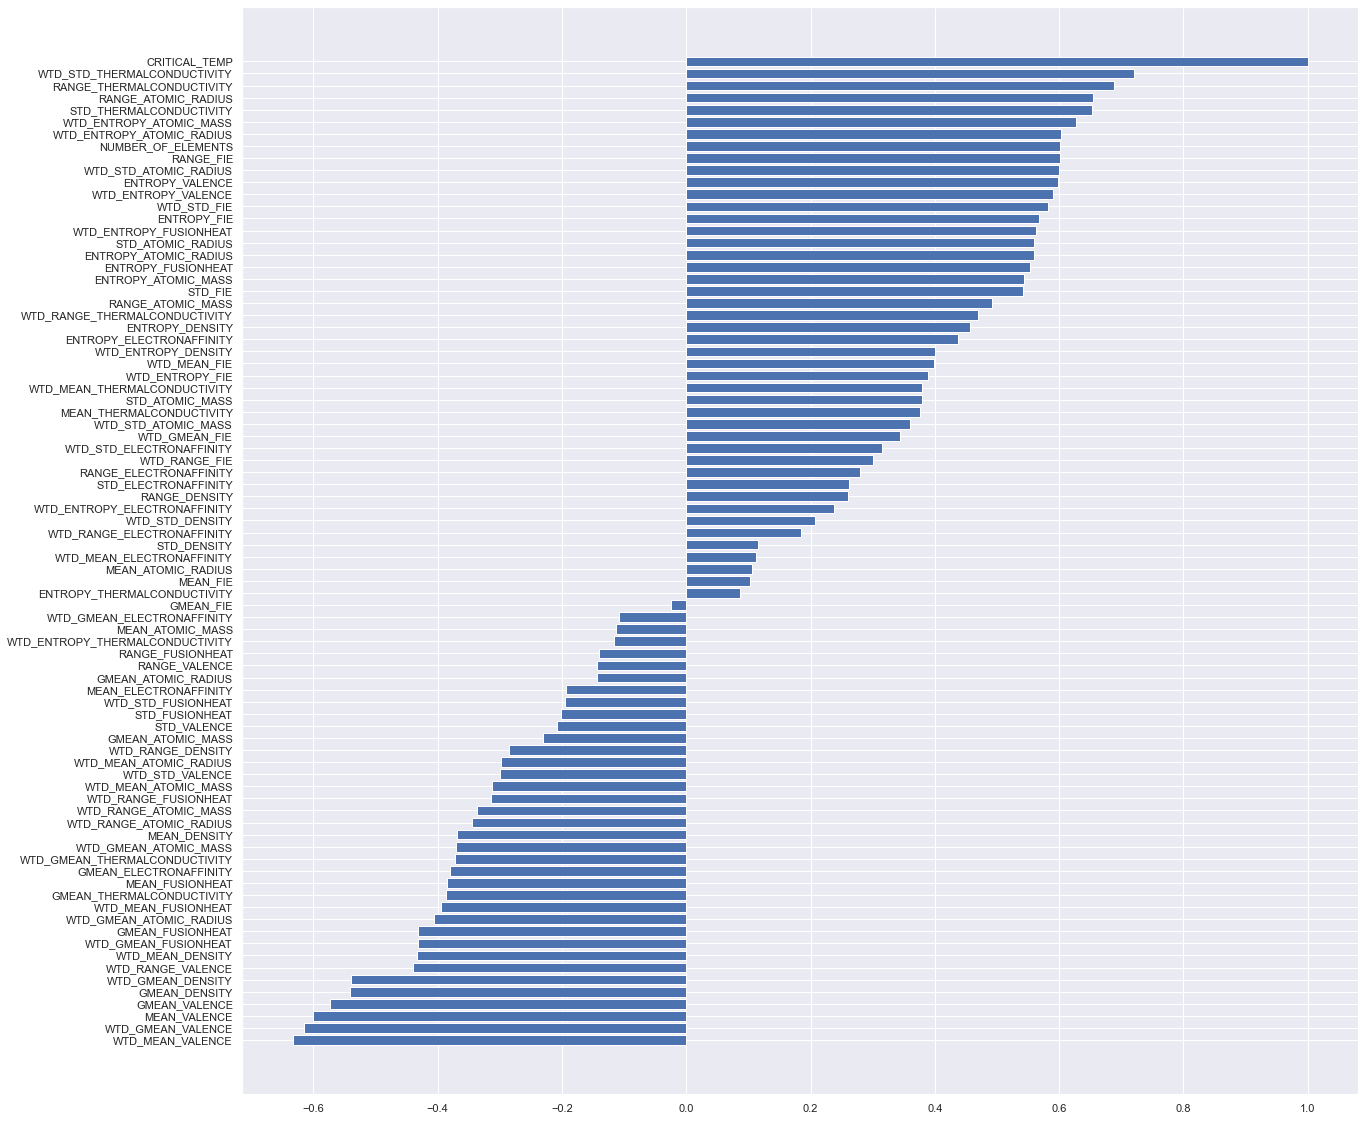

In [45]:
plt.barh(link.index, width=link)
plt.gcf().set_size_inches(20, 20)

Повече от умерена негативна връзка с целевата променлива имат следните предиктори:

In [25]:
neg_link = link.index[link < -0.5]
neg_link

Index(['WTD_MEAN_VALENCE', 'WTD_GMEAN_VALENCE', 'MEAN_VALENCE',
       'GMEAN_VALENCE', 'GMEAN_DENSITY', 'WTD_GMEAN_DENSITY'],
      dtype='object')

Повече от умерена положителна връзка с целевата променлива имат следните предиктори:

In [26]:
pos_link = link.index[link > 0.5]
pos_link[: -1]

Index(['STD_FIE', 'ENTROPY_ATOMIC_MASS', 'ENTROPY_FUSIONHEAT',
       'ENTROPY_ATOMIC_RADIUS', 'STD_ATOMIC_RADIUS', 'WTD_ENTROPY_FUSIONHEAT',
       'ENTROPY_FIE', 'WTD_STD_FIE', 'WTD_ENTROPY_VALENCE', 'ENTROPY_VALENCE',
       'WTD_STD_ATOMIC_RADIUS', 'RANGE_FIE', 'NUMBER_OF_ELEMENTS',
       'WTD_ENTROPY_ATOMIC_RADIUS', 'WTD_ENTROPY_ATOMIC_MASS',
       'STD_THERMALCONDUCTIVITY', 'RANGE_ATOMIC_RADIUS',
       'RANGE_THERMALCONDUCTIVITY', 'WTD_STD_THERMALCONDUCTIVITY'],
      dtype='object')

За да проверим статистическата грешка ще използвам <b>pearsonr</b> функцията от <b>scipy.stats</b> библиотеката.

In [27]:
from scipy.stats import pearsonr

In [28]:
pearsonr(x=char_ds['CRITICAL_TEMP'], y=char_ds['NUMBER_OF_ELEMENTS'])

(0.6010685709560266, 0.0)

За да изчисля коефициента за всички двойки променливи ще подам ламбда функция на corr метода, като от резултата ще взема само 2-рата част от кортежа, а именно статистическата грешка.

In [30]:
p_values = char_ds.corr(method=lambda x,y: pearsonr(x,y)[1])
p_values

NUMBER_OF_ELEMENTS  MEAN_ATOMIC_MASS  \
NUMBER_OF_ELEMENTS                     1.000000e+00      4.410764e-96   
MEAN_ATOMIC_MASS                       4.410764e-96      1.000000e+00   
WTD_MEAN_ATOMIC_MASS                   0.000000e+00      0.000000e+00   
GMEAN_ATOMIC_MASS                      0.000000e+00      0.000000e+00   
WTD_GMEAN_ATOMIC_MASS                  0.000000e+00      0.000000e+00   
ENTROPY_ATOMIC_MASS                    0.000000e+00      3.251953e-52   
WTD_ENTROPY_ATOMIC_MASS                0.000000e+00      3.541071e-46   
RANGE_ATOMIC_MASS                      0.000000e+00      1.435057e-75   
WTD_RANGE_ATOMIC_MASS                  0.000000e+00      0.000000e+00   
STD_ATOMIC_MASS                        0.000000e+00     5.276115e-184   
WTD_STD_ATOMIC_MASS                    0.000000e+00      1.270780e-81   
MEAN_FIE                              1.624502e-133      0.000000e+00   
WTD_MEAN_FIE                           0.000000e+00     7.082687e-236   
GMEAN_FIE                              4.104438e-04     1.360873e-277   
WTD_GMEAN_FIE                          0.000000e+00     4.733082e-230   
ENTROPY_FIE                            0.000000e+00     1.075361e-132   
WTD_ENTROPY_FIE                        0.000000e+00     2.122501e-127   
RANGE_FIE                              0.000000e+00     2.170613e-314   
WTD_RANGE_FIE                          0.000000e+00      6.030039e-32   
STD_FIE                                0.000000e+00      0.000000e+00   
WTD_STD_FIE                            0.000000e+00     2.017263e-237   
MEAN_ATOMIC_RADIUS                     8.395227e-01      0.000000e+00   
WTD_MEAN_ATOMIC_RADIUS                 0.000000e+00      0.000000e+00   
GMEAN_ATOMIC_RADIUS                   2.623903e-277      0.000000e+00   
WTD_GMEAN_ATOMIC_RADIUS                0.000000e+00      0.000000e+00   
ENTROPY_ATOMIC_RADIUS                  0.000000e+00      1.439746e-93   
WTD_ENTROPY_ATOMIC_RADIUS              0.000000e+00     7.434698e-104   
RANGE_ATOMIC_RADIUS                    0.000000e+00      0.000000e+00   
WTD_RANGE_ATOMIC_RADIUS                0.000000e+00      5.542061e-95   
STD_ATOMIC_RADIUS                      0.000000e+00      0.000000e+00   
WTD_STD_ATOMIC_RADIUS                  0.000000e+00      0.000000e+00   
MEAN_DENSITY                           0.000000e+00      0.000000e+00   
WTD_MEAN_DENSITY                       0.000000e+00      0.000000e+00   
GMEAN_DENSITY                          0.000000e+00      0.000000e+00   
WTD_GMEAN_DENSITY                      0.000000e+00      0.000000e+00   
ENTROPY_DENSITY                        0.000000e+00      2.398076e-10   
WTD_ENTROPY_DENSITY                    0.000000e+00      1.235001e-04   
RANGE_DENSITY                          0.000000e+00     4.720319e-187   
WTD_RANGE_DENSITY                      0.000000e+00      0.000000e+00   
STD_DENSITY                           5.218286e-212     2.879931e-288   
WTD_STD_DENSITY                        0.000000e+00     6.256685e-156   
MEAN_ELECTRONAFFINITY                  2.999436e-68      5.132750e-38   
WTD_MEAN_ELECTRONAFFINITY             2.134970e-182      4.758380e-19   
GMEAN_ELECTRONAFFINITY                 0.000000e+00     1.037109e-170   
WTD_GMEAN_ELECTRONAFFINITY             1.196600e-14      2.980547e-86   
ENTROPY_ELECTRONAFFINITY               0.000000e+00      8.416212e-41   
WTD_ENTROPY_ELECTRONAFFINITY           0.000000e+00      7.759226e-56   
RANGE_ELECTRONAFFINITY                 0.000000e+00     1.020355e-166   
WTD_RANGE_ELECTRONAFFINITY            1.360537e-279      1.355893e-01   
STD_ELECTRONAFFINITY                   0.000000e+00     1.406704e-129   
WTD_STD_ELECTRONAFFINITY               0.000000e+00      1.230712e-84   
MEAN_FUSIONHEAT                        0.000000e+00      1.811802e-90   
WTD_MEAN_FUSIONHEAT                    0.000000e+00      1.391719e-87   
GMEAN_FUSIONHEAT                       0.000000e+00      3.071076e-02   
WTD_GMEAN_FUSIONHE

Умерена сигурност в резултата имаме при:

In [31]:
med_cer = p_values[p_values < 0.05]

In [32]:
med_cer['CRITICAL_TEMP'].sort_values()

NUMBER_OF_ELEMENTS                  0.000000e+00
WTD_ENTROPY_DENSITY                 0.000000e+00
RANGE_DENSITY                       0.000000e+00
WTD_RANGE_DENSITY                   0.000000e+00
GMEAN_ELECTRONAFFINITY              0.000000e+00
ENTROPY_ELECTRONAFFINITY            0.000000e+00
RANGE_ELECTRONAFFINITY              0.000000e+00
STD_ELECTRONAFFINITY                0.000000e+00
WTD_STD_ELECTRONAFFINITY            0.000000e+00
MEAN_FUSIONHEAT                     0.000000e+00
WTD_MEAN_FUSIONHEAT                 0.000000e+00
GMEAN_FUSIONHEAT                    0.000000e+00
WTD_GMEAN_FUSIONHEAT                0.000000e+00
ENTROPY_FUSIONHEAT                  0.000000e+00
WTD_ENTROPY_FUSIONHEAT              0.000000e+00
ENTROPY_DENSITY                     0.000000e+00
WTD_RANGE_FUSIONHEAT                0.000000e+00
WTD_MEAN_THERMALCONDUCTIVITY        0.000000e+00
GMEAN_THERMALCONDUCTIVITY           0.000000e+00
WTD_GMEAN_THERMALCONDUCTIVITY       0.000000e+00
RANGE_THERMALCONDUCT

In [33]:
med_cer['CRITICAL_TEMP'].sort_values().size

82

От проведените до тук изследвания взимам решение да намаля броя предиктори само до тези, които имат повече от умерена линейна корелация с целевата променлива - тези записани в <b>neg_link</b> и <b>pos_link</b>.

In [100]:
neg_link, pos_link # ще запазя разбира се и целевата променлива

(Index(['WTD_MEAN_VALENCE', 'WTD_GMEAN_VALENCE', 'MEAN_VALENCE',
        'GMEAN_VALENCE', 'GMEAN_DENSITY', 'WTD_GMEAN_DENSITY'],
       dtype='object'),
 Index(['STD_FIE', 'ENTROPY_ATOMIC_MASS', 'ENTROPY_FUSIONHEAT',
        'ENTROPY_ATOMIC_RADIUS', 'STD_ATOMIC_RADIUS', 'WTD_ENTROPY_FUSIONHEAT',
        'ENTROPY_FIE', 'WTD_STD_FIE', 'WTD_ENTROPY_VALENCE', 'ENTROPY_VALENCE',
        'WTD_STD_ATOMIC_RADIUS', 'RANGE_FIE', 'NUMBER_OF_ELEMENTS',
        'WTD_ENTROPY_ATOMIC_RADIUS', 'WTD_ENTROPY_ATOMIC_MASS',
        'STD_THERMALCONDUCTIVITY', 'RANGE_ATOMIC_RADIUS',
        'RANGE_THERMALCONDUCTIVITY', 'WTD_STD_THERMALCONDUCTIVITY',
        'CRITICAL_TEMP'],
       dtype='object'))

In [101]:
type(neg_link), neg_link.size, type(pos_link), pos_link.size

(pandas.core.indexes.base.Index, 6, pandas.core.indexes.base.Index, 20)

In [102]:
neg_list = neg_link.tolist()
pos_list = pos_link.tolist()
neg_list

['WTD_MEAN_VALENCE',
 'WTD_GMEAN_VALENCE',
 'MEAN_VALENCE',
 'GMEAN_VALENCE',
 'GMEAN_DENSITY',
 'WTD_GMEAN_DENSITY']

In [103]:
type(neg_list), type(pos_list)

(list, list)

In [104]:
np_list = neg_list + pos_list
np_list

['WTD_MEAN_VALENCE',
 'WTD_GMEAN_VALENCE',
 'MEAN_VALENCE',
 'GMEAN_VALENCE',
 'GMEAN_DENSITY',
 'WTD_GMEAN_DENSITY',
 'STD_FIE',
 'ENTROPY_ATOMIC_MASS',
 'ENTROPY_FUSIONHEAT',
 'ENTROPY_ATOMIC_RADIUS',
 'STD_ATOMIC_RADIUS',
 'WTD_ENTROPY_FUSIONHEAT',
 'ENTROPY_FIE',
 'WTD_STD_FIE',
 'WTD_ENTROPY_VALENCE',
 'ENTROPY_VALENCE',
 'WTD_STD_ATOMIC_RADIUS',
 'RANGE_FIE',
 'NUMBER_OF_ELEMENTS',
 'WTD_ENTROPY_ATOMIC_RADIUS',
 'WTD_ENTROPY_ATOMIC_MASS',
 'STD_THERMALCONDUCTIVITY',
 'RANGE_ATOMIC_RADIUS',
 'RANGE_THERMALCONDUCTIVITY',
 'WTD_STD_THERMALCONDUCTIVITY',
 'CRITICAL_TEMP']

In [105]:
len(np_list)

26

In [106]:
char_ds.shape

(21263, 82)

In [107]:
fds = char_ds.copy()
fds.shape

(21263, 82)

In [108]:
charcols = char_ds.columns.tolist()
type(charcols), len(charcols)

(list, 82)

In [109]:
for collink in charcols:
    if collink not in np_list : 
        fds.drop(columns=collink, inplace=True)

In [110]:
fds.shape

(21263, 26)

In [111]:
fds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21262
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NUMBER_OF_ELEMENTS           21263 non-null  int64  
 1   ENTROPY_ATOMIC_MASS          21263 non-null  float64
 2   WTD_ENTROPY_ATOMIC_MASS      21263 non-null  float64
 3   ENTROPY_FIE                  21263 non-null  float64
 4   RANGE_FIE                    21263 non-null  float64
 5   STD_FIE                      21263 non-null  float64
 6   WTD_STD_FIE                  21263 non-null  float64
 7   ENTROPY_ATOMIC_RADIUS        21263 non-null  float64
 8   WTD_ENTROPY_ATOMIC_RADIUS    21263 non-null  float64
 9   RANGE_ATOMIC_RADIUS          21263 non-null  int64  
 10  STD_ATOMIC_RADIUS            21263 non-null  float64
 11  WTD_STD_ATOMIC_RADIUS        21263 non-null  float64
 12  GMEAN_DENSITY                21263 non-null  float64
 13  WTD_GMEAN_DENSIT

In [112]:
fds.to_csv('./data/YG_SupConChars.csv')